<a href="https://colab.research.google.com/github/Pedro-Boechat/trainee/blob/main/periodo3knn_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA

# Multiclasse

In [ ]:
df = pd.read_csv('/content/winequality.csv')

In [ ]:
df.tail()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
6492,6492,7.7,0.32,0.62,10.6,0.036,56.0,153.0,0.99780,3.13,0.44,8.9,6,0
6493,6493,6.2,0.22,0.28,2.2,0.040,24.0,125.0,0.99170,3.19,0.48,10.5,6,0
6494,6494,7.9,0.33,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,0
6495,6495,7.0,0.30,0.28,2.2,0.042,21.0,177.0,0.99166,3.20,0.57,11.4,5,0
6496,6496,6.4,0.22,0.49,7.5,0.054,42.0,151.0,0.99480,3.27,0.52,10.1,6,0


In [ ]:
df.isna().sum()

Unnamed: 0              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_is_red             0
dtype: int64

In [ ]:
df = df.drop(columns='Unnamed: 0')

In [ ]:
colunas = df.columns

## Normalizar

In [ ]:
for i in df.columns.drop('quality'):
  df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,0.173554,0.353333,0.048193,0.023006,0.102990,0.052083,0.041475,0.128205,0.651163,0.308989,0.449275,6,1.0
1,0.363636,0.613333,0.054217,0.026074,0.093023,0.020833,0.071429,0.187777,0.465116,0.185393,0.144928,6,1.0
2,0.214876,0.106667,0.295181,0.079755,0.073090,0.083333,0.262673,0.136688,0.224806,0.426966,0.362319,6,0.0
3,0.231405,0.100000,0.156627,0.010736,0.059801,0.052083,0.281106,0.121265,0.496124,0.213483,0.289855,6,0.0
4,0.280992,0.106667,0.174699,0.036810,0.044850,0.055556,0.255760,0.134953,0.496124,0.258427,0.304348,6,0.0


## Verificar balanceamento

In [ ]:
df['quality'].value_counts()
# Desbalanceado. Verificar

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
from sklearn.utils import resample

In [ ]:
# Separando as qualidades
df_6 = df[df['quality']==6]
df_4 = df[df['quality']==4]
df_5 = df[df['quality']==5]
df_7 = df[df['quality']==7]
df_8 = df[df['quality']==8]
df_3 = df[df['quality']==3]
df_9 = df[df['quality']==9]
# Resampling
df_6_corrigido = resample(df_6, 
                                 replace=False,    
                                 n_samples=216)
df_4_corrigido = resample(df_4, 
                                 replace=True,    
                                 n_samples=216)
df_5_corrigido = resample(df_5, 
                                 replace=False,    
                                 n_samples=216)
df_7_corrigido = resample(df_7, 
                                 replace=False,    
                                 n_samples=216)
df_8_corrigido = resample(df_8, 
                                 replace=True,    
                                 n_samples=216)
df_3_corrigido = resample(df_3, 
                                 replace=True,    
                                 n_samples=216)
df_9_corrigido = resample(df_9, 
                                 replace=True,    
                                 n_samples=216)
# Combinando as qualidades resampled
#df = pd.concat([df_6_corrigido,df_8_corrigido,df_4_corrigido,df_5_corrigido,df_7_corrigido])

In [ ]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

## Implementando KNN

In [ ]:
from sklearn.model_selection import train_test_split

X = df[colunas.drop('quality')]


PCA não influenciou na precisão, então decidi removê-lo do código

In [ ]:
#pca = PCA(.95)

In [ ]:
#pca.fit(X)

In [ ]:
#pca.n_components_

In [ ]:
#X = pca.transform(X)

In [ ]:
Y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

## Train

In [ ]:
X_test = np.array(X_test)
X_train = np.array(X_train)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
distancias = [np.sqrt(np.sum(np.square((x_test - X_train)), axis=1)) for x_test in X_test]

In [ ]:
from scipy import stats

pred = np.array([])
k = 3
tam = len(distancias)
for i in range(tam):
  while True:

    idxkneigh = distancias[i].argsort()[:k] # Pega os indices das k menores distancias
    vizinhos = [y_train[idxkneigh[j]] for j in range(k)] # Busca qual a classificação desses indices: red ou não
    unique, counts = np.unique(vizinhos, return_counts=True)
    empates = (dict(zip(unique, counts)))
    if len(empates) > 1:


# Abaixo está o método usado para prevenir empates. Consiste em diminuir k até que não haja mais nenhum empate

      maior = empates.pop(max(empates))
      idxsegmaior = max(empates)
      segmaior = empates[idxsegmaior]

      if maior == segmaior:
        k -= 1
      else:
          break
    else:
      break



      
  
  mode_info = stats.mode(vizinhos) # Pega a moda das classificações dos KNN

  pred = np.append(pred, mode_info[0]) # Prediz

In [ ]:
acertos = 0
for i in range(tam):
  if pred[i] == y_test[i]:
    acertos += 1

print(acertos)

826


In [ ]:
acertos/(tam)

0.6353846153846154

63% Precisão tirando 3 e 9 e sem fazer resample, k = 3

KNN teve 55%

64% Precisão mantendo 3 e 9, sem fazer resample, k = 3

KNN teve 55%

60% Precisão tirando 3 e 9 e resampling a 216, k = 3

KNN entre 44% e 55%

65% precisão com 3 e 9, com resample a 216, k = 3

KNN teve 58%

58% Sem normalizar, com 3 e 9, sem resample, k=3

KNN teve 48%

## KNN do Python

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
resultado = knn.predict(X_test)
resultado

array([6, 6, 6, ..., 6, 4, 7])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


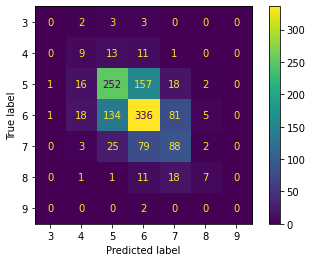

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(estimator=knn,X= X_test, y_true=y_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.18      0.26      0.22        34
           5       0.59      0.57      0.58       446
           6       0.56      0.58      0.57       575
           7       0.43      0.45      0.44       197
           8       0.44      0.18      0.26        38
           9       0.00      0.00      0.00         2

    accuracy                           0.53      1300
   macro avg       0.31      0.29      0.29      1300
weighted avg       0.53      0.53      0.53      1300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
